In [79]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,SimpleRNN, Reshape, Bidirectional


In [71]:
df = pd.read_csv("IMDB Dataset.csv")


In [73]:
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})


In [75]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<br\s*/?>', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    return text


In [9]:

df['cleaned_review'] = df['review'].apply(preprocess_text)



In [11]:

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [16]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8535
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [17]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_review'])
X_seq = tokenizer.texts_to_sequences(df['cleaned_review'])
X_padded = pad_sequences(X_seq, maxlen=200, padding='post', truncating='post')


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [31]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=200),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
     LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


D:\Anoconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 154s 121ms/step - accuracy: 0.5123 - loss: 0.6918 - val_accuracy: 0.5454 - val_loss: 0.6889
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 112ms/step - accuracy: 0.5737 - loss: 0.6726 - val_accuracy: 0.5937 - val_loss: 0.6570
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 114ms/step - accuracy: 0.7191 - loss: 0.5809 - val_accuracy: 0.6696 - val_loss: 0.6108
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 212s 169ms/step - accuracy: 0.7603 - loss: 0.5095 - val_accuracy: 0.8527 - val_loss: 0.3465
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 147s 117ms/step - accuracy: 0.8665 - loss: 0.3271 - val_accuracy: 0.8521 - val_loss: 0.3295


In [40]:

test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8563 - loss: 0.3248


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

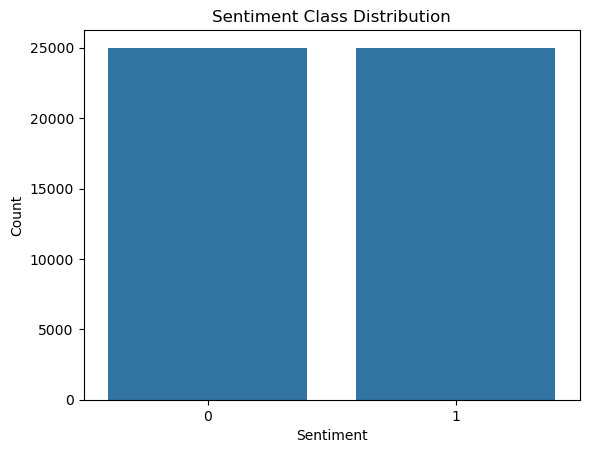

In [49]:
sns.countplot(x=df['sentiment'])
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [59]:
# Save RNN Model and Tokenizer
model.save("rnn_model.h5")
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [65]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_review'])
X_seq = tokenizer.texts_to_sequences(df['cleaned_review'])
X_padded = pad_sequences(X_seq, maxlen=200, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=200),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print("RNN Model Accuracy:", test_acc)


Epoch 1/5


D:\Anoconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 66ms/step - accuracy: 0.4986 - loss: 0.7194 - val_accuracy: 0.5039 - val_loss: 0.6931
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.5035 - loss: 0.6980 - val_accuracy: 0.5099 - val_loss: 0.6933
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.4991 - loss: 0.6945 - val_accuracy: 0.4917 - val_loss: 0.6943
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.5044 - loss: 0.6935 - val_accuracy: 0.4936 - val_loss: 0.6935
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.5006 - loss: 0.6937 - val_accuracy: 0.4953 - val_loss: 0.6948
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5010 - loss: 0.6943
RNN Model Accuracy: 0.4952999949455261


In [81]:

nn_model = Sequential ([Reshape((X_train.shape[1],1), input_shape = (X_train.shape[1],)),
                        SimpleRNN (128, return_sequences=False),
                        Dropout(0.5),
                        Dense(1, activation="sigmoid")])



# Build LSTM

Lstm_model = Sequential([Reshape((X_train.shape[1],1), input_shape = (X_train.shape[1],)),
                        LSTM(128, return_sequences=False),
                        Dropout(0.5),
                        Dense(1, activation="sigmoid")])

#Bidirectional LSTM

bi1stm_model = Sequential ([Reshape((X_train.shape[1],1), input_shape=(X_train.shape[1],)),
                        Bidirectional(LSTM(128, return_sequences=False)),
                        Dropout (0.5),
                        Dense(1, activation="sigmoid")])

D:\Anoconda\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [147]:


model.compile(optimizer = "adam", loss= "binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), verbose=1)

pred=model.predict(X_test)
pred=(pred>0.5).astype(int)

print(classification_report(y_test, pred))


#Evaluation metrics for Bilstm model

model=bi1stm_model
model.compile(optimizer = "adam", loss= "binary_crossentropy", metrics=["accuracy"])
model.fit(X_train,y_train, batch_size=32, validation_data=(X_test, y_test), verbose=1)

pred=model.predict(X_test)
pred=(pred>0.5).astype(int)

print(classification_report(y_test, pred))


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 91s 70ms/step - accuracy: 0.5833 - loss: 0.6704 - val_accuracy: 0.5372 - val_loss: 0.6889
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
              precision    recall  f1-score   support

           0       0.52      0.76      0.62      4961
           1       0.57      0.31      0.41      5039

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.51     10000
weighted avg       0.55      0.54      0.51     10000

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 153s 121ms/step - accuracy: 0.5109 - loss: 0.7102 - val_accuracy: 0.5142 - val_loss: 0.6926
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step
              precision    recall  f1-score   support

           0       0.51      0.94      0.66      4961
           1       0.61      0.10      0.17      5039

    accuracy                           0.51     10000
   macro avg       0.56      0.52      0.41     10000
weighted avg       0.56      0.51      0.41     10000



In [148]:
df_p = df[df["sentiment" ]=="positive"].iloc[0:2500]

df_n = df[df["sentiment"]=="negative"].iloc[0:2500]

df_filter = pd.concat([df_p, df_n], axis = 1)

!pip install fasttext



import fasttext

model=fasttext.train_supervised(input="imdb_train.txt", epoch=25, lr=1.0, wordNgrams=2, dim=100)

model.save_model("imdb_sentiment_model.ftz")

print("Model trained and saved!")

  Using cached fasttext-0.9.3.tar.gz (73 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
Failed to build fasttext


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [31 lines of output]
  C:\Users\DELL\AppData\Local\Temp\pip-build-env-xuuzk4qy\overlay\Lib\site-packages\setuptools\dist.py:493: SetuptoolsDeprecationWarning: Invalid dash-separated options
  !!
  
          ********************************************************************************
          Usage of dash-separated 'description-file' will not be supported in future
          versions. Please use the underscore name 'description_file' instead.
  
          By 2025-Mar-03, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!
    opt = self.warn_dash_deprecation(opt, section)
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpyt

ModuleNotFoundError: No module named 'fasttext'